### aim: 

### date: 

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [21]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings 
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [22]:
w2 = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')
w2 = w2.assign(csize=w2['e3t_0'])
csize = np.zeros([1,31,149,182])
for i in range(0,31):
    csize[0,i,:,:] = w2.tmask[0,i,:,:] * w2.e1t[0,:,:] * w2.e2t[0,:,:]
w2['csize'].values = csize
ts = (w2.csize[0,0,:,:])

1978948685.975551 0.054533586454646586
1978948685.9755483 0.05453359364722721 0.9918306507008243 0.0
777474918.2699658 0.22671103650135666
777474918.2699655 0.22671102468537485 0.21699355412015187 4.801854910655107e-09


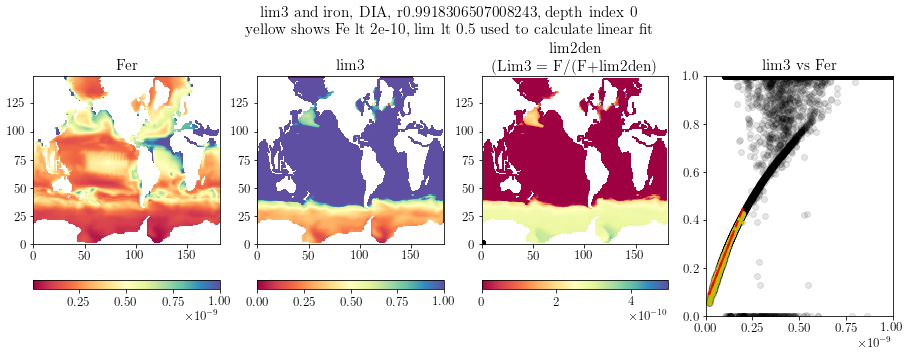

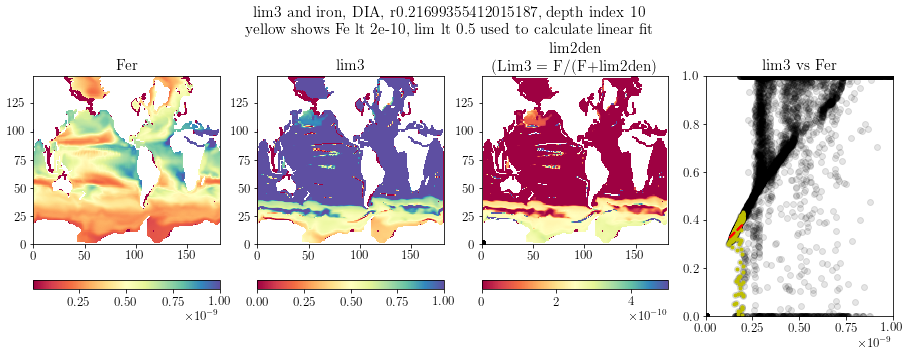

In [24]:
from scipy import stats

ptrcf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc')
diadf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc')

d = 0
Fer = ptrcf.Fer[0,d,:,:].values; 
lim3 = diadf.lim3dia[0,d,:,:].values

def plot_lr(Fer,lim3, pft, d):


    w = xr.open_dataset(f'./data/R4B1_lim2den_{pft}.nc')
    lim2den = w.lim2den[0,d,:,:].values

    Fer[ts == 0] = np.nan
    lim3[ts == 0] = np.nan
    lim2den[ts == 0] = np.nan

    Fera = Fer[lim3 <1]
    lim3a = lim3[lim3 <1]
    cmap = plt.get_cmap("Spectral")

    fact = 1.1
    fig, axs = plt.subplots(1,4, figsize=(14*fact, 4*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    ind = 0 
    q = axs[ind].pcolormesh(Fer, vmin = 1e-11, vmax = 1e-9, cmap = cmap); axs[ind].set_title('Fer'); plt.colorbar(q, ax = axs[ind], orientation = 'horizontal')
    ind = 1
    q = axs[ind].pcolormesh(lim3, vmin = 0, vmax = 1, cmap = cmap); axs[ind].set_title('lim3'); plt.colorbar(q, ax = axs[ind], orientation = 'horizontal')
    ind = 2
    q = axs[ind].pcolormesh(lim2den, vmin = 1e-20, vmax = 5e-10, cmap = cmap); axs[ind].set_title('lim2den \n (Lim3 = F/(F+lim2den)'); plt.colorbar(q, ax = axs[ind],  orientation = 'horizontal')

    # lim3t = np.copy(lim3)
    # lim3t[lim3 > 0] = 1
    # print(np.shape(lim3t[lim3t == 0]))
    # print(np.shape(lim3t[np.isnan(lim3t)]))
    # print(np.shape(lim3t[lim3t == 1]))
    # q = axs[3].pcolormesh(lim3t[:,170:190], vmin = 0, vmax = 1, cmap = cmap); axs[ind].set_title('lim2den \n (Lim3 = F/(F+lim2)'); plt.colorbar(q, ax = axs[3])

    x = np.copy(Fer) 
    y = np.copy(lim3)
    axs[ind].plot(np.ravel(x),np.ravel(y), 'ko', alpha = 0.1)
    mask = ( (x!= 0) & (y != 0) & (x < 0.2e-9) & (y < 0.5) & (~np.isnan(y)))
    ind = 3
    x2 = np.ravel(x[mask])
    y2 = np.ravel(y[mask])
    # axs[ind].scatter(x2, y2, alpha = 0.3)

    m, b = np.polyfit(x2, y2, 1)
    print(f'{m} {b}')
    m, b, r_value, p_value, std_err = stats.linregress(x2, y2)
    print(f'{m} {b} {r_value} {p_value}')

    axs[ind].plot(np.ravel(x),np.ravel(y), 'ko', alpha = 0.1)
    axs[ind].plot(x2, y2, 'y.', x2, m*x2+b, '--r', alpha = 1, lw = 2)
    axs[ind].set_ylim([0,1])
    axs[ind].set_xlim([0,1e-9])#
    axs[ind].set_title('lim3 vs Fer')
    tit = f'lim3 and iron, {pft}, r{r_value}, depth index {d} \n yellow shows Fe lt 2e-10, lim lt 0.5 used to calculate linear fit'
    plt.suptitle(tit, y = 1.1)

    
ptrcf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc')
diadf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc')
d = 0
Fer = ptrcf.Fer[0,d,:,:].values; 
lim3 = diadf.lim3dia[0,d,:,:].values
pft = 'DIA'
plot_lr(Fer,lim3, pft, d)

d = 10
Fer = ptrcf.Fer[0,d,:,:].values; 
lim3 = diadf.lim3dia[0,d,:,:].values
pft = 'DIA'
plot_lr(Fer,lim3, pft, d)
# Fer = ptrcf.Fer[0,d,:,:].values; 
# lim3 = diadf.lim3pha[0,d,:,:].values
# pft = 'PHA'
# plot_lr(Fer,lim3, pft, d)

# d = 11
# Fer = ptrcf.Fer[0,d,:,:].values; 
# lim3 = diadf.lim3pic[0,d,:,:].values
# pft = 'PIC'
# plot_lr(Fer,lim3, pft, 10)

## get r2

In [25]:
import pandas as pd 
def get_r2(pft,lim3nam,d,ll = 0.5, lf = 0.25e-9, verbose = False):

    columns = ['m', 'b', 'r', 'p']
    #Create an empty DataFrame
    rows = np.arange(0,19)
    df = pd.DataFrame(columns=columns, index=rows)
    
    
    for d in range(0,19):
        Fer = ptrcf.Fer[0,d,:,:].values; 
        lim3 = diadf[lim3nam][0,d,:,:].values

        x = np.copy(Fer) 
        y = np.copy(lim3)
        mask = ( (x!= 0) & (y != 0) & (x < lf) & (y < ll) & (~np.isnan(y)))
        x2 = np.ravel(x[mask])
        y2 = np.ravel(y[mask])
        try:
            m, b, r_value, p_value, std_err = scipy.stats.linregress(x2, y2)

            if verbose:
                print(f'{pft} {d} {m} {b} {r_value} {p_value}')
            df.loc[d, 'm'] = m
            df.loc[d, 'b'] = b
            df.loc[d, 'r'] = r_value
            df.loc[d, 'p'] = p_value
        except:
            df.loc[d, 'm'] = np.nan
            df.loc[d, 'b'] = np.nan
            df.loc[d, 'r'] = np.nan
            df.loc[d, 'p'] = np.nan
    df.to_csv(f'./data/{pft}_Fe_lim3rel.csv')
    
ex = False
if ex:

    get_r2('DIA','lim3dia',d,ll = 0.5, lf = 0.2e-9, verbose = True)
    #t3 = ['lim3dia','lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix']
    get_r2('MIX','lim3mix',d,ll = 0.5, lf = 0.2e-9, verbose = True)
    get_r2('COC','lim3coc',d,ll = 0.5, lf = 0.2e-9, verbose = True)
    get_r2('PIC','lim3pic',d,ll = 0.5, lf = 0.2e-9, verbose = True)
    get_r2('PHA','lim3pha',d,ll = 0.5, lf = 0.2e-9, verbose = True)
    get_r2('FIX','lim3fix',d,ll = 0.5, lf = 0.2e-9, verbose = True)

## good of fit with de

0.9918306507008244


Text(0.5, 1.0, 'r**2 of fit found between Fe \n and xlim3 (Fe limitation) at diff depth ind. \n (calc when Fe lt 2.5e-10 and xlim3 lt 0.5)')

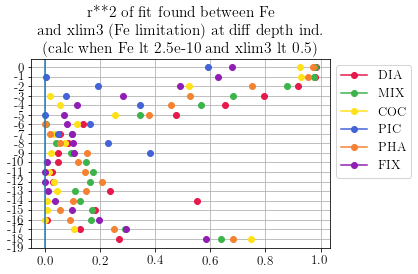

In [26]:
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',\
'#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', \
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


w = pd.read_csv(f'./data/{pft}_Fe_lim3rel.csv')
q = w.loc[0,'r']
print(q)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

for i in range(0,len(rows)):
    w = pd.read_csv(f'./data/{rows[i]}_Fe_lim3rel.csv')
    for d in range(0,19):
        
        q = w.loc[d,'r']
        q = q**2
        
        if d == 0:
            
            plt.plot(q,-d, color = cols[i], label = rows[i], marker = 'o')
        else:
            plt.plot(q,-d, color = cols[i], marker = 'o')

plt.axvline(x=0)
ax.set_yticks(np.arange(-19,1))
ax.set_yticklabels(np.arange(-19,1))
plt.grid()
plt.legend(bbox_to_anchor = [1,1])
plt.title('r**2 of fit found between Fe \n and xlim3 (Fe limitation) at diff depth ind. \n (calc when Fe lt 2.5e-10 and xlim3 lt 0.5)')

## code for xlim3fer calc

In [27]:
def findInTrcSms(filename, variable, lon = 6, verbose = True):
    
    #for finding variables in namelist.trc.sms and returning them as an array
    w5 = np.nan
    with open(filename, 'r') as file:
        for line in file:
            ## find and parse the variables
            if variable in line:
                w = line.strip()
                w1 = ''.join(w.split())
                w2 = w1.split('=')
                w3 = w2[1].split(',')
                w4 = w3[0:lon]
                w5 = np.array(w4).astype(float)
                if verbose: 
                    print(w)
                    print(w5)
    return w5
                        

def getParsFromTrcSms(namtrc, verbose = True):
    
    rn_kmpphy = findInTrcSms(namtrc, 'rn_kmpphy', verbose = False)
    rn_kmnphy = findInTrcSms(namtrc, 'rn_kmnphy', verbose = False)
    rn_nutthe = findInTrcSms(namtrc, 'rn_nutthe',lon = 1, verbose = False)
    rn_sildia = findInTrcSms(namtrc, 'rn_sildia',lon = 1, verbose = False)
    rn_qmaphy = findInTrcSms(namtrc, 'rn_qmaphy', verbose = False)
    rn_qmiphy = findInTrcSms(namtrc, 'rn_qmiphy', verbose = False)  
    rn_qopphy = findInTrcSms(namtrc, 'rn_qopphy', verbose = False)  
    rn_munfix = findInTrcSms(namtrc, 'rn_munfix',lon = 1, verbose = False) 
    
    if verbose:
        print(f'rn_kmpphy: {rn_kmpphy} (nitrogen half saturation concentrat.)')
        print(f'rn_kmnphy: {rn_kmnphy} (phosphate half saturation concentration)')
        print(f'rn_nutthe: {rn_nutthe}')
        print(f'rn_sildia: {rn_sildia}')        
        print(f'rn_qmaphy: {rn_qmaphy}')
        print(f'rn_qmiphy: {rn_qmiphy}')   
        print(f'rn_qopphy: {rn_qopphy}')  
        print(f'rn_munfix: {rn_munfix}')  
        
    return rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix

In [ ]:
def get_lim(pPFT,jppo4,jpsil,jpdin, jpfer, rn_kmpphy, rn_kmnphy, rn_nutthe,\
            rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix,\
            depth = 0, verbose = False):
    
    mapping = {
        "DIA": 0,
        "MIX": 1,
        "COC": 2,
        "PIC": 3,
        "PHA": 4,
        "FIX": 5
    }
    
    
    rn_kmpphy = rn_kmpphy[mapping[pPFT]]
    rn_kmnphy = rn_kmnphy[mapping[pPFT]]
    rn_qmaphy = rn_qmaphy[mapping[pPFT]]
    rn_qmiphy = rn_qmiphy[mapping[pPFT]]
    rn_qopphy = rn_qopphy[mapping[pPFT]]
    rn_nutthe = rn_nutthe[0]    
    rn_sildia = rn_sildia[0]

    w = pd.read_csv(f'./data/{rows[i]}_Fe_lim3rel.csv')
    m = w.loc[depth,'m']
    b = w.loc[depth,'b']
    xlim3_fer = jpfer * m + b 
        
    if verbose:
        print(f'for {pPFT} we have the following parameters')
        print(f'rn_kmpphy: {rn_kmpphy} (nitrogen half saturation concentrat.)')
        print(f'rn_kmnphy: {rn_kmnphy} (phosphate half saturation concentration)')

        print('----')
        print(f'we are furthermore using the following constants')
        print(f'rn_nutthe: {rn_nutthe}')
        print(f'rn_sildia: {rn_sildia}')

    xlim5_sil = 1 ## silica limita
    # xlim3_fer = 1 #we don't fully understand iron, iron model not currently in
    
    limnut = -99 #(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)
    xlim_phyt = -99 
    
    xlim4_po4 = (jppo4 - rn_kmpphy * rn_nutthe) / ((jppo4) + rn_kmpphy * (1 - rn_nutthe))
    
    if pPFT == 'DIA':
        
        xlim5_sil = (jpsil - rn_sildia * rn_nutthe) / (jpsil + rn_sildia * (1 - rn_nutthe))
        
    xlim6_din = (jpdin - rn_kmnphy * rn_nutthe) / (jpdin + rn_kmnphy * (1 - rn_nutthe))
    
    if pPFT == 'FIX':
        
        dinlim = (jpdin - rn_kmnphy * rn_nutthe) / (jpdin + rn_kmnphy * (1 - rn_nutthe))
        xlim6_din = dinlim +rn_munfix*(1.-dinlim)
        
    ##xlim_fer
    # stofoo = read_in_stofoo(depth, pPFT, tval = 'p0.50')
    # quopfe = max(min(stofoo,rn_qmaphy),rn_qmiphy)
    # xlim3_fer =min((quopfe-rn_qmiphy)/(rn_qopphy-rn_qmiphy),1.)*(1.+rn_nutthe)-rn_nutthe
    

    xlim_phyt = np.min([xlim4_po4,xlim5_sil,xlim6_din,xlim3_fer])
    
    #(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)

    if xlim_phyt == xlim6_din:
        limnut = 1
    if xlim_phyt == xlim5_sil:
        limnut = 2
    if xlim_phyt == xlim4_po4:
        limnut = 3
    if xlim_phyt == xlim3_fer:
        limnut = 4

    if verbose:
        
        print('---')
        try:
            print(f'NO3 limitation {xlim6_din.values}')
        except:
            print(f'NO3 limitation {xlim6_din}') 
        try:
            print(f'Si limitation {xlim5_sil.values}') 
        except:
            print(f'Si limitation {xlim5_sil}') 
        try:
            print(f'PO4 limitation {xlim4_po4.values}')  
        except:
            print(f'PO4 limitation {xlim4_po4}')  
        try:
            print(f'Fer limitation {xlim3_fer.values}')
        except:
            print(f'Fer limitation {xlim3_fer}')
        print('--')
        print(f'limiting nutrient is: {limnut} with value of {xlim_phyt}')
        print('(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)')
        
    return limnut, xlim_phyt, xlim6_din, xlim5_sil, xlim4_po4, xlim3_fer 

In [ ]:

def GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                             whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                             verbose = False, dlim = 19):
    
    '''
    
    written by TJŠJ at UEA, 2024, T.Jarnikova@uea.ac.uk
    based on RIV12/NEMO/TOP_SRC/PlankTOM/bgcpro.F90, written by ET
    
    calculates limiting nutrient from ptrc outputs for a given model, year, phytoplankton functional type, and namelist.trc.sms. 
    saves as: {WhereToSave}/{modelName}_y{year}_{pPFT}_LoP.nc
    saves both limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe) and value of nutrient limitation (0-1)

    arguments:
    trcsmsPath 
        path to namelist.trc.sms. eg '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4A0/namelist.trc.sms'
    modelName
        name of model, eg TOM12_TJ_RVA0
    year
        year to run for, eg 1955 
    pPFT
        functional group, one of DIA MIX COC	PIC	PHA	FIX	
    ModelDirectory = '/gpfs/data/greenocean/software/runs/'
        where model is found, default shown above;
    whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
        where model is found, default shown above;
    verbose = False, 
        if this is true the script outputs various facts about what it's doing
    dlim = 23
        depth level to calculate to - this is an expensive routine, by default it goes up to but not including depth level 23
        (python indexing, first level is 0. by default last included level is approx 1000 m)
    
    '''
    print('land ho')
    
    t1 = time.time()
    ## get and open ptrc
    w = xr.open_dataset(ptrcf)
    w2 = xr.open_dataset(diadf)
    nav_lat = w.nav_lat
    nav_lon = w.nav_lon
    deptht = w.deptht
    time_counter = w.time_counter
    
    #get vals out as array
    NO3 = w.NO3.values
    Si = w.Si.values
    PO4 = w.PO4.values
    Fer = w.Fer.values
    
    #
    lim3dia = w2.lim3dia.values
    lim3mix = w2.lim3mix.values
    lim3coc = w2.lim3coc.values
    lim3pic = w2.lim3pic.values
    lim3pha = w2.lim3pha.values
    lim3fix = w2.lim3fix.values
    
    
    tmask = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh = tmask.tmask.values 
    
    limitNut = np.zeros([12,31,149,182])
    limitVal = np.zeros([12,31,149,182])
    limitN = np.zeros([12,31,149,182])
    limitS = np.zeros([12,31,149,182])
    limitP = np.zeros([12,31,149,182])
    limitF = np.zeros([12,31,149,182])
    
    savenam = f'{whereToSave}/{modelName}_y{year}_{pPFT}_LoP_heurxlim3.nc'
    print(f'making {savenam}')
        
        
    rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix\
    = getParsFromTrcSms(trcsmsPath, verbose = True) 
    

    for d in range(0,dlim): #do
        print(f'd {d}')
        for y in range(0,149): #149
            
            if (y%10 == 0):
                print(f'y {y}')
            
            for x in range(0,182): #182

                if tmesh[0,d,y,x] == 0:
                    pass
                else:
                    for t in range(0,12):

                        jpdin = NO3[t,d,y,x]
                        jpsil = Si[t,d,y,x]
                        jppo4 = PO4[t,d,y,x]
                        jpfer = Fer[t,d,y,x]
                        
                        
                        
                        limnut, xlim_phyt, xlim6_din, xlim5_sil, xlim4_po4, xlim3_fer = \
                        get_lim(pPFT,jppo4,jpsil,jpdin, jpfer, rn_kmpphy, rn_kmnphy, rn_nutthe,\
                        rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix,\
                        depth = 0, verbose = False)          
                        
                        limitNut[t,d,y,x] = limnut
                        limitVal[t,d,y,x] = xlim_phyt
                        limitN[t,d,y,x] = xlim6_din
                        limitS[t,d,y,x] = xlim5_sil
                        limitP[t,d,y,x] = xlim4_po4
                        limitF[t,d,y,x] = xlim3_fer

    ### save as .nc    
    data_vars = {'limitNut':(['time_counter', 'deptht', 'y', 'x'], limitNut,
    {'units': 'dimensionless',
    'long_name':'limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe) '}),
                 
                 'limitVal':(['time_counter', 'deptht', 'y', 'x'], limitVal,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitN':(['time_counter', 'deptht', 'y', 'x'], limitN,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                'limitS':(['time_counter', 'deptht', 'y', 'x'], limitS,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitP':(['time_counter', 'deptht', 'y', 'x'], limitP,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitF':(['time_counter', 'deptht', 'y', 'x'], limitF,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], time_counter),
    'nav_lat': (['y','x'], nav_lat),
    'nav_lon': (['y','x'], nav_lon),
    'deptht': (['deptht'], deptht)}
    # define global attributes
    attrs = {'made in':'LimitsOfPhytoplankton/explore.ipynb',
    'desc': f'calculated to depth level {dlim}'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)


    t2 = time.time()
    if verbose:
        print(f'seconds taken: {t2-t1}')
#     return w
    return ds

In [ ]:
ptrcf = f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc'
diadf = f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc'

trcsmsPath = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4A0/namelist.trc.sms'
modelName = 'TOM12_TJ_R4B1'
year = 1990
ex = False
if ex:
    
    pPFT = 'DIA'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'MIX'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    pPFT = 'COC'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    pPFT = 'PIC'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'PHA'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'FIX'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

## go compare heuristic to actual 

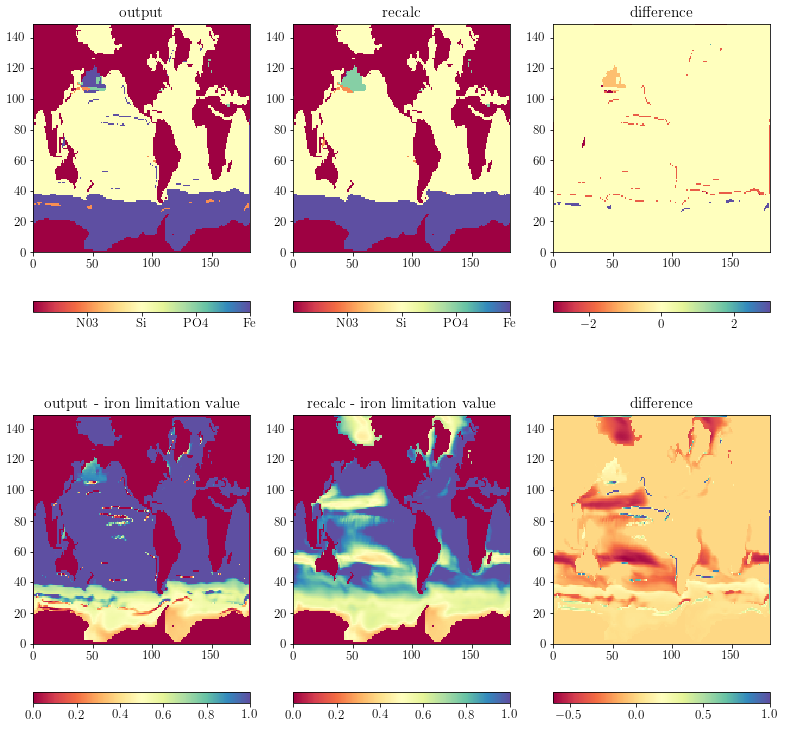

In [49]:
#TOM12_TJ_R4B1_y1990_DIA_LoP.nc

d = 9

l3 = xr.open_dataset('./data/TOM12_TJ_R4B1_y1990_DIA_LoP.nc')
l3h = xr.open_dataset('./data/TOM12_TJ_R4B1_y1990_DIA_LoP_heurxlim3.nc')

cmaps = [plt.cm.Spectral, cm.gray, plt.cm.Spectral, cm.gray]
tcmap = plt.cm.Spectral

fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolormesh(l3.limitNut[0,d,:,:], cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[0], orientation='horizontal')
cbar.set_ticks([1,2,3,4])
cbar.set_ticklabels(['N03','Si','PO4','Fe',])

w = axs[1].pcolormesh(l3h.limitNut[0,d,:,:], cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[1], orientation='horizontal')
cbar.set_ticks([1,2,3,4])
cbar.set_ticklabels(['N03','Si','PO4','Fe',])

w = axs[2].pcolormesh(l3h.limitNut[0,d,:,:]-l3.limitNut[0,d,:,:], cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[2], orientation='horizontal')

#limitF

w = axs[0+3].pcolormesh(l3.limitF[0,d,:,:], cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[3], orientation='horizontal')
# cbar.set_ticks([1,2,3,4])
# cbar.set_ticklabels(['N03','Si','PO4','Fe',])

tv = l3h.limitF[0,d,:,:].values
tv[np.where(tv>1)] = 1
w = axs[1+3].pcolormesh(tv, cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[4], orientation='horizontal')
# cbar.set_ticks([1,2,3,4])
# cbar.set_ticklabels(['N03','Si','PO4','Fe',])

w = axs[2+3].pcolormesh(tv-l3.limitF[0,d,:,:], cmap = tcmap)
cbar = plt.colorbar(w, ax = axs[5], orientation='horizontal')

tits = ['output','recalc','difference', 'output - iron limitation value',  'recalc - iron limitation value', 'difference']
for i in range(0,6):
    axs[i].set_title(tits[i])

0.9765696998838002
0.9340100620433415
0.017173028035057155

0.9767750530913171
0.9329835269761382
0.015741286073780586

0.9765847257282526
0.9319292967280932
0.015652142767599707

0.9762640024220406
0.9292340884573894
0.013807982740021575

0.9752559726962458
0.9239061852138956
0.011735861981936508

0.9710047201618341
0.9128561298885475
0.016054253559026198

0.9533394985614467
0.8951199938856619
0.06865255273616631

0.937023728393532
0.8833844980838299
0.12813258692991433

0.9215372670807453
0.8686782742233382
0.18326519600722185

0.9084486556123509
0.8591585538448342
0.23708024188360424

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan

nan
nan
nan



Text(0, 0.5, 'depth index')

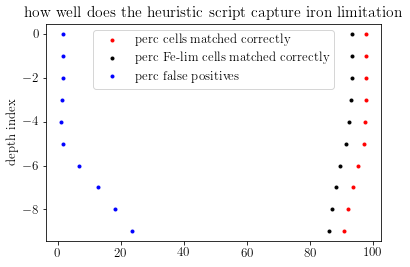

In [68]:
plt.figure()

for i in range(0,19):
    
    l3a = l3.limitNut[:,i,:,:].values
    l3ha = l3h.limitNut[:,i,:,:].values
    
    m = (l3a != 0) & (l3ha != 0)
    l3am = l3a[m]
    l3ham = l3ha[m]
    
    same_value_count = np.sum(l3am == l3ham)
    
    corr = (same_value_count/np.size(l3am))
    print(corr)
    
    m2 = (l3am == 4) & (l3am == l3ham)
    coffF = np.sum(m2)/np.sum(l3am == 4)
    print(coffF)
    
    m3 = (l3am != 4) & (l3ham == 4)
    coffF2 = np.sum(m3)/np.sum(l3am == 4)
    print(coffF2)
    print()
    #corrF = np.sum(
    
    if i == 0 :
        plt.plot(corr*100,-i, 'r.', label = 'perc cells matched correctly')
        plt.plot(coffF*100,-i, 'k.', label = 'perc Fe-lim cells matched correctly')
        plt.plot(coffF2*100,-i, 'b.', label = 'perc false positives')
    else:
        plt.plot(corr*100,-i, 'r.', )
        plt.plot(coffF*100,-i, 'k.', )
        plt.plot(coffF2*100,-i, 'b.',)
        
plt.legend(loc = 'best')
plt.title('how well does the heuristic script capture iron limitation')
plt.ylabel('depth index')

In [56]:
w = [True, False, True]
print(np.sum(w))

2
